# Equações diferenciais

Em matemática, uma equação diferencial é uma equação cuja incógnita é uma função que aparece na equação sob a forma das respectivas derivadas. 
As equações diferenciais são utilizadas para modelar problemas de ciências
e engenharia que envolvem a mudança de uma variável em relação a outra.
Muitas equações diferenciais oriundas de problemas da vida real são muito
complicadas e não possuem solução analítica. Com certa frequência
recorre-se a métodos numéricos para obter uma solução aproximada,
transformando o modelo contínuo em um modelo discreto. O processo pelo
qual se obtém as equações algébricas é denominado de discretização. É a
discretização que torna o problema “finito” e viabiliza a sua “solução” através
de computadores.

As equações diferenciais dividem-se em dois tipos:

* Uma equação diferencial ordinária (EDO) contém apenas funções de uma variável e derivadas daquela mesma variável;
* Uma equação diferencial parcial (EDP) contém funções com mais do que uma variável e suas derivadas parciais.



## Problema de Valor Inicial (PVI)

Se trata de EDOs envolvendo problemas de valor inicial, nesse caso podemos utilizar métodos baseados
em polinômios de Taylor e métodos de Runge-Kutta.


É chamado de problema de valor inicial quando queremos resolver uma EDO de 1ª ordem, do tipo:

$$\frac{dy}{dt}=f(t,y) , \hspace{0.6cm} y(t_0)=y_0$$



### Método de Taylor de ordem p = 1 (Euler)

O método de Euler é um método de Taylor de ordem 1. Dado por:

$$y_{n+1} = y_n + h f(t_n, t_n)$$
onde $h$ é o tamanho de cada etapa e $t_{n}=t_{0}+nh$.


### Métodos de Runge-Kutta de 4ª ordem

Os métodos de Runge-Kutta têm a vantagem de não necessitarem de derivadas de ordem superior da função
$f(t, y)$, como nos métodos de Taylor, porém, obtém-se as mesmas ordens dos erros de
truncamento. Os métodos de Runge-Kutta são baseados na avaliação da função $f(t, y)$ em alguns pontos. Considere o PVI:

$$y'(t) = f(t, y) , \hspace{0.6cm} y(t_1)=y_0$$

O método de Runge-Kutta de ordem 4 (RK-4) é dado por:


\begin{aligned}y_{n+1}&=y_{n}+{\frac {1}{6}}\left(k_{1}+2k_{2}+2k_{3}+k_{4}\right)h,\\t_{n+1}&=t_{n}+h\\\end{aligned}
for n = 0, 1, 2, 3, ..., 

\begin{aligned}k_{1}&=\ f(t_{n},y_{n}),\\k_{2}&=\ f\!\left(t_{n}+{\frac {h}{2}},y_{n}+h{\frac {k_{1}}{2}}\right),\\k_{3}&=\ f\!\left(t_{n}+{\frac {h}{2}},y_{n}+h{\frac {k_{2}}{2}}\right),\\k_{4}&=\ f\!\left(t_{n}+h,y_{n}+hk_{3}\right).\end{aligned}




In [41]:
# primeiro, definido as funções ...

import numpy as np
import matplotlib.pyplot as plt

# met. de euler    y(t + dt) = y(t) + dt * f(y(t), t)    em que  f(y(t), t) = y' 
def euler(f, y0, t):
    dt = t[1] - t[0]
    yt = [y0]
    for i in t[1:]:
        yt.append(yt[-1] + dt*f(t, yt[-1]))        
    return np.array(yt)

# met. de Runge–Kutta    y(t + dt) = y(t) + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)  em que  k1 = f(y(t), t) = y' ...
def RK4(f, y0, t):
    dt = t[1]-t[0]
    yt = [y0]    
    for i in t[1:]:
        k1 = f(t, yt[-1])
        k2 = f(t+(dt/2), yt[-1]+(dt/2)*k1)
        k3 = f(t+(dt/2),yt[-1]+(dt/2)*k2)
        k4 = f(t+dt,yt[-1]+dt*k3)
        yt.append(yt[-1]+(dt/6)*(k1+2*k2+2*k3+k4))
    return np.array(yt)

## Exemplo 1) Paraquedista
--------------------------------------------------------
Usar o método de Euler e RK4 para resolver o problema do paraquedista em queda com resistência do ar linear. A equação diferencial é

$\dfrac{dv}{dt} = g - b*v$,

sendo $g = 9.8 m/s²$ e $b = 1 s⁻¹$. Use como condição inicial $v(0) = 0$, e resolva o problema no intervalo de $t=0$ até $t=5 s$. Varie o passo de discretização dt para ver como a solução muda. Compare os resultados fazendo um gráfico de $v$ vs $t$.  


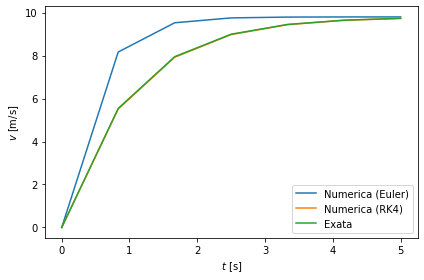

In [42]:
g = 9.8
b = 1 
f = lambda t, v: g - b*v  #eq.diferencial

y0 = 0       # cond inicial


n = 7      # n de pontos
t = np.linspace(0, 5, n)



yt = euler(f, y0, t)  # valor numerico via euler

yt1 = RK4(f, y0, t)  # valor numerico via RK4

ye = yt[n-1] + (y0 - yt[n-1])*np.exp(-b*t)   #valor exato  

#grafico
plt.plot(t, yt, label='Numerica (Euler)')
plt.plot(t, yt1, label='Numerica (RK4)')
plt.plot(t, ye, label='Exata')
plt.legend()
plt.xlabel(R'$t$ [s]')
plt.ylabel(R'$v$ [m/s]')
plt.tight_layout()
plt.show()


## Exemplo 2) Presa e predador = Lotka-Volterra
--------------------------------------------------------
Considere que em um certo ambiente existem predadores (raposas) e presas (coelhos), sendo x o número de predadores e y o número de presas. Veja na Wikipedia [1] a dedução das equações diferenciais:

$\dfrac{dx}{dt} = x * (alpha - beta * y)$

$\dfrac{dy}{dt} = y * (delta*x - gamma)$

Use alpha = beta = delta = 1, condições iniciais x(0) = 2, y(0) = 1, e intervalo de tempo de t=0 até t=50. Varie o passo dt para ver como a solução muda.

Resolva as EDOs escrevendo duas expressões do método de Euler e propagueas simultaneamente (um único loop!). Faça o gráfico das populações como função do tempo.

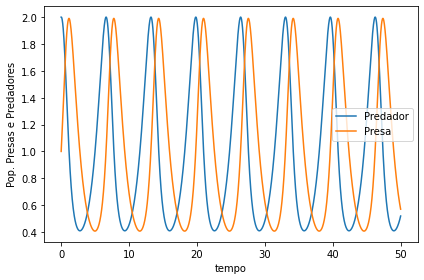

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# met. de euler    y(t + dt) = y(t) + dt * f(y(t), t)    em que  f(y(t), t) = y' 
def euler(f1, f2, y0, x0, t):
    dt = t[1] - t[0]
    xt = [x0]
    yt = [y0]    
    for i in t[1:]:
        xt.append(xt[-1] + dt*f1(xt[-1], yt[-1], t))
        yt.append(yt[-1] + dt*f2(xt[-1], yt[-1], t))   
    return np.array(xt), np.array(yt)

alpha = beta = delta = gamma = 1
n = 2000       # n de pontos
y0 = 1       # cond inicial
x0 = 2       # cond inicial

f1 = lambda x, y, t: x * (alpha - beta*y)  #eq.diferencial dx/dt = x * (alpha - beta * y)
f2 = lambda x, y, t: y * (delta*x - gamma)   #eq.diferencial dy/dt = y * (delta*x - gamma)
t = np.linspace(0, 50, n)

y = euler(f1, f2, y0, x0, t)  #valor numerico

#grafico
plt.plot(t, y[0], label='Predador')
plt.plot(t, y[1], label='Presa')
plt.legend()
plt.xlabel(R'tempo')
plt.ylabel(R'Pop. Presas e Predadores')
plt.tight_layout()
plt.show()

### Exemplo 3) Pêndulo amortecido
--------------------------------------------------------
Considere a EDO do pêndulo amortecido,

$ \dfrac{d^2x}{dt^2} = -(\omega^2)x - bv $

sendo $\omega = 2\pi$ rad/s a frequência natural de oscilações, e $b$ o coeficiente de amortecimento linear.


a) Resolva esta EDO numericamente pelo método de Euler usando a redução de ordem.

b) Resolva esta EDO usando os métodos apropriados do SciPy.

##### a)

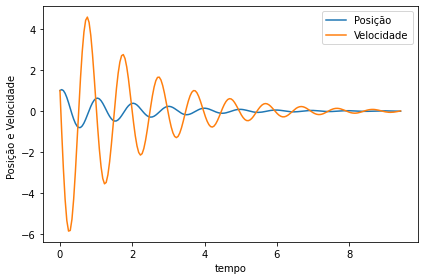

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# met. de euler    y(t + dt) = y(t) + dt * f(y(t), t)    em que  f(y(t), t) = y' 
def euler(f, v0, t):
    dt = t[1] - t[0]
    xt = [v0[0]]
    yt = [v0[1]]
    for i in t[1:]:
        xt.append(xt[-1] + dt*f(t, np.array([xt[-1], yt[-1]]))[0])
        yt.append(yt[-1] + dt*f(t, np.array([xt[-1], yt[-1]]))[1])   
    return np.array(xt), np.array(yt)

def f(t, v):
    b = 1
    w = 2 * np.pi
    x = v[0]
    y = v[1]
    return np.array([y, -(w**2)*x - b*y])

n = 200       # n de pontos
y0 = 1       # cond inicial
x0 = 1       # cond inicial
v0 = np.array([x0, y0])

t = np.linspace(0, 3 * np.pi , n)

y = euler(f, v0, t)  #valor numerico

#grafico
plt.plot(t, y[0], label='Posição')
plt.plot(t, y[1], label='Velocidade')
plt.legend()
plt.xlabel(R'tempo')
plt.ylabel(R'Posição e Velocidade ')
plt.tight_layout()
plt.show()

##### b)

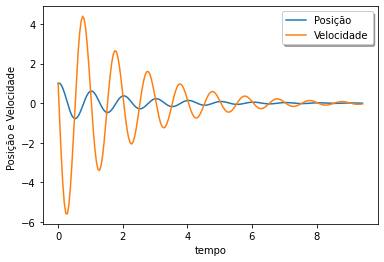

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def f(t, z, w, b):
    x, y = z
    return [y, -(w**2)*x - b*y]


sol = solve_ivp(f, [0, 15], [1, 1], args=(2*np.pi, 1),
                dense_output=True)

t = np.linspace(0, 3*np.pi, 200)
z = sol.sol(t)
plt.plot(t, z.T)
plt.legend(['Posição', 'Velocidade'], shadow=True)
plt.xlabel(R'tempo')
plt.ylabel(R'Posição e Velocidade ')
plt.show()